In [96]:
!pip install numpy
!pip install pandas
!pip install sklearn
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

# Importo le librerie di cui ho bisogno

In [97]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Importo e leggo i file train.csv e test.csv

In [98]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [99]:
list(train)

['gender',
 'ssc_p',
 'ssc_b',
 'hsc_p',
 'hsc_b',
 'hsc_s',
 'degree_p',
 'degree_t',
 'workex',
 'etest_p',
 'specialisation',
 'mba_p',
 'salary',
 'status']

# Analizzo il tipo di dato presente in train

In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          137 non-null    object 
 1   ssc_p           137 non-null    float64
 2   ssc_b           137 non-null    object 
 3   hsc_p           137 non-null    float64
 4   hsc_b           137 non-null    object 
 5   hsc_s           137 non-null    object 
 6   degree_p        137 non-null    float64
 7   degree_t        137 non-null    object 
 8   workex          137 non-null    object 
 9   etest_p         137 non-null    float64
 10  specialisation  137 non-null    object 
 11  mba_p           137 non-null    float64
 12  salary          95 non-null     float64
 13  status          137 non-null    object 
dtypes: float64(6), object(8)
memory usage: 15.1+ KB


In [101]:
pd.set_option("max_columns", None) 
pd.set_option("max_rows", None)

In [102]:
train.head(200)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,status
0,M,77.67,Others,64.89,Others,Commerce,70.67,Comm&Mgmt,No,89.00,Mkt&Fin,60.39,300000.0,Placed
1,M,84.20,Central,69.40,Central,Science,65.00,Sci&Tech,Yes,80.00,Mkt&HR,52.72,255000.0,Placed
2,M,52.00,Others,55.00,Others,Commerce,56.30,Comm&Mgmt,No,59.00,Mkt&Fin,64.74,NaN,Not Placed
3,M,63.00,Central,60.00,Central,Commerce,57.00,Comm&Mgmt,Yes,78.00,Mkt&Fin,54.55,204000.0,Placed
4,F,60.23,Central,69.00,Central,Science,66.00,Comm&Mgmt,No,72.00,Mkt&Fin,59.47,230000.0,Placed
5,M,54.00,Others,47.00,Others,Science,57.00,Comm&Mgmt,No,89.69,Mkt&HR,57.10,NaN,Not Placed
6,M,76.76,Others,76.50,Others,Commerce,67.50,Comm&Mgmt,Yes,73.35,Mkt&Fin,64.15,350000.0,Placed
7,F,77.40,Others,60.00,Others,Science,64.74,Sci&Tech,Yes,92.00,Mkt&Fin,63.62,300000.0,Placed
8,F,69.00,Others,62.00,Others,Commerce,69.00,Comm&Mgmt,Yes,67.00,Mkt&HR,62.35,240000.0,Placed
9,M,62.00,Central,65.00,Others,Commerce,60.00,Comm&Mgmt,No,84.00,Mkt&Fin,64.15,NaN,Not Placed


# Rimuovo dai file .csv la colonna salary che contiene alcuni valori nulli

In [103]:
train = train.drop(["salary"], axis=1) 
test = test.drop(["salary"], axis=1)

# A seguito del comando drop sul train la nuova tabella è la seguente:

In [104]:
train.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,77.67,Others,64.89,Others,Commerce,70.67,Comm&Mgmt,No,89.0,Mkt&Fin,60.39,Placed
1,M,84.20,Central,69.40,Central,Science,65.00,Sci&Tech,Yes,80.0,Mkt&HR,52.72,Placed
2,M,52.00,Others,55.00,Others,Commerce,56.30,Comm&Mgmt,No,59.0,Mkt&Fin,64.74,Not Placed
3,M,63.00,Central,60.00,Central,Commerce,57.00,Comm&Mgmt,Yes,78.0,Mkt&Fin,54.55,Placed
4,F,60.23,Central,69.00,Central,Science,66.00,Comm&Mgmt,No,72.0,Mkt&Fin,59.47,Placed


# Analizzo i tipi di dati e converto se necessario i dati di tipo Object in tipo numerico attraverso LabelEncoder

In [105]:
train.dtypes

gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
dtype: object

In [106]:
feature = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']

In [107]:
encoder = LabelEncoder()
for element in feature:
    train[element] = encoder.fit_transform(train[element])
    
for element in feature:
    test[element] = encoder.fit_transform(test[element])

# Verifico che i nuovi tipi siano solo int64 oppure float64

In [108]:
train.dtypes

gender              int64
ssc_p             float64
ssc_b               int64
hsc_p             float64
hsc_b               int64
hsc_s               int64
degree_p          float64
degree_t            int64
workex              int64
etest_p           float64
specialisation      int64
mba_p             float64
status              int64
dtype: object

# Visiono la nuova tabella ottenuta

In [109]:
train.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,77.67,1,64.89,1,1,70.67,0,0,89.0,0,60.39,1
1,1,84.20,0,69.40,0,2,65.00,2,1,80.0,1,52.72,1
2,1,52.00,1,55.00,1,1,56.30,0,0,59.0,0,64.74,0
3,1,63.00,0,60.00,0,1,57.00,0,1,78.0,0,54.55,1
4,0,60.23,0,69.00,0,2,66.00,0,0,72.0,0,59.47,1


In [110]:
x_train = train.drop(['status'], axis=1)
y_train = train['status']

x_test = test.drop(['status'], axis=1)
y_test = test['status']

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [112]:
model= RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)

94.29


# Analisi dei dati attraverso i grafici

<AxesSubplot:xlabel='status', ylabel='count'>

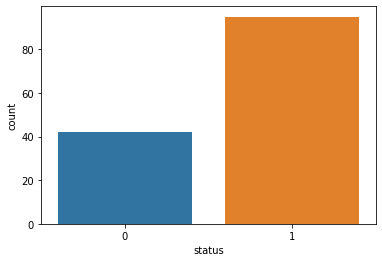

In [113]:
sns.countplot(x=train['status'])

Nel grafico sopra riportato vediamo che nel dataset di train ci sono molte più persone con status = 1 rispetto a quelle con status = 0

<AxesSubplot:xlabel='status', ylabel='count'>

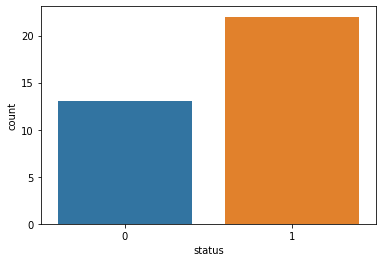

In [114]:
sns.countplot(x=test['status'])

Nel grafico sopra roportato vediamo il dataset di test rispetto a status

<Figure size 1008x432 with 0 Axes>

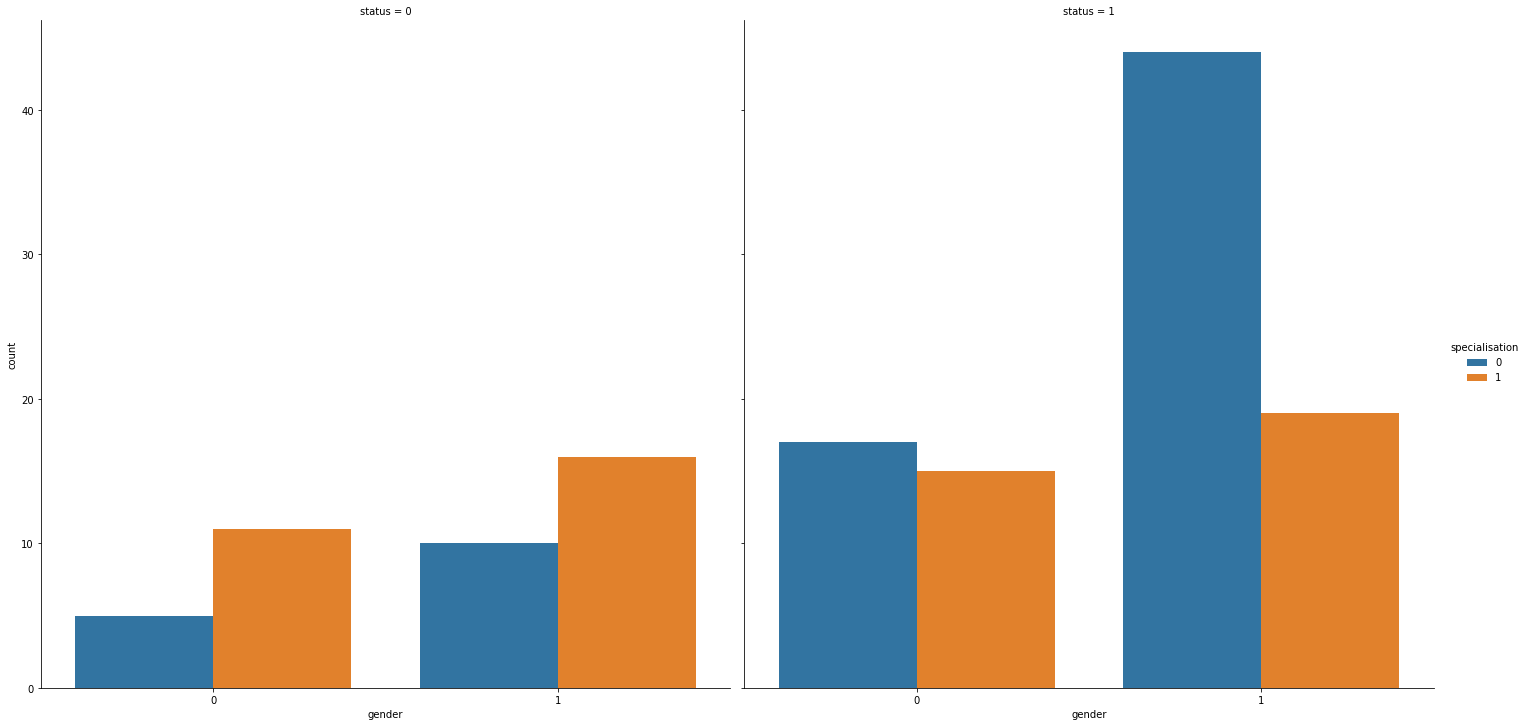

In [115]:
plt.figure(figsize=(14,6))
g=sns.catplot(x='gender', hue='specialisation', col='status', data=train, kind='count', height=10, aspect=1)

Nel grafici sopra riportati analizzo le dipendenze e gli andamenti per quanto riguarda le feature gender e specialisation rispetto allo status.
* Nel primo grafico si analizza la dipendenza di gender con la specialisation quando lo status vale 0
* Nel secondo grafico si analizza la dipendenza di gender con la specialisation quando lo status vale 1

<AxesSubplot:>

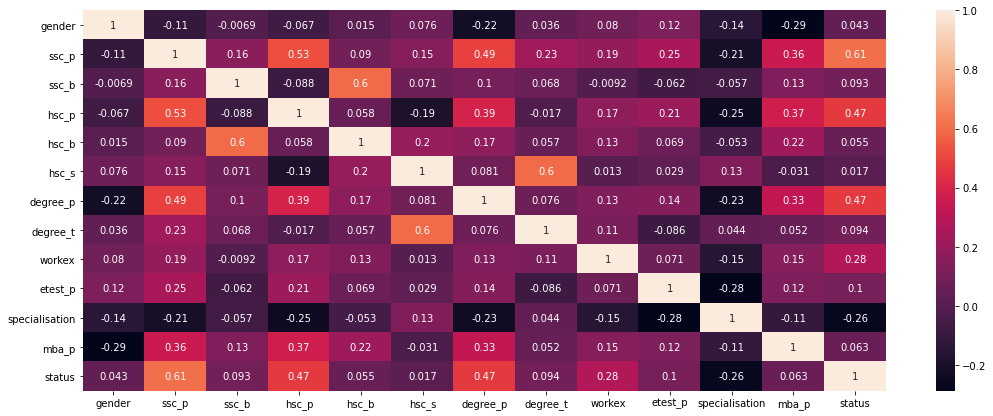

In [116]:
plt.figure(figsize=(18,7))
sns.heatmap(data= train.corr(), annot= True)

Il grafico sopra mostrato rappresenta la correlazione.
* Un valore negativo sta a significare una relazione di proporzionalità inversa
* Un valore positivo sta a significare relazione di proporzionalità diretta
* Un valore pari a zero sta a significare l'assenza di una correlazione e pertanto la feature può essere eliminata

Dalla heatmap possiamo andare ad analizzare le feature che possono essere *droppate* in quanto non avviene una correlazione con lo status:
* gender
* ssc_b
* hsc_b
* hsc_s
* degree_t
* etest_p
* mba_p

In [117]:
elementToDrop = ['gender', 'ssc_b', 'hsc_b', 'degree_t', 'etest_p', 'mba_p']

In [118]:
train = train.drop(elementToDrop, axis=1)
train.head()

,ssc_p,hsc_p,hsc_s,degree_p,workex,specialisation,status
0,77.67,64.89,1,70.67,0,0,1
1,84.20,69.40,2,65.00,1,1,1
2,52.00,55.00,1,56.30,0,0,0
3,63.00,60.00,1,57.00,1,0,1
4,60.23,69.00,2,66.00,0,0,1


In [119]:
test = test.drop(elementToDrop, axis=1)
test.head()

,ssc_p,hsc_p,hsc_s,degree_p,workex,specialisation,status
0,52.0,50.0,0,61.0,0,0,0
1,78.5,65.5,2,67.0,1,0,1
2,62.0,72.0,1,65.0,0,0,1
3,51.0,44.0,1,57.0,0,0,0
4,55.0,67.0,1,64.0,0,0,0


<AxesSubplot:>

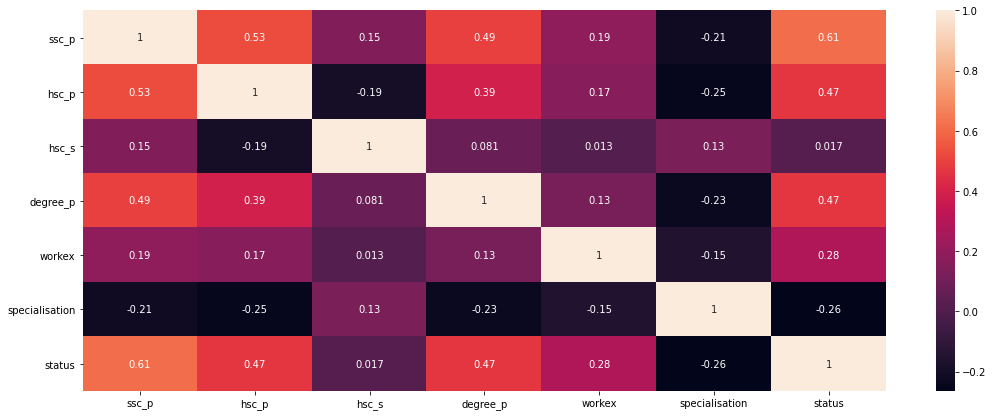

In [120]:
plt.figure(figsize=(18,7))
sns.heatmap(data= train.corr(), annot= True)